<a href="https://colab.research.google.com/github/jxxngho/HG_MLDL/blob/main/07_3_Neural_Network_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손실함수

In [15]:
# fit() 메서드의 실행 결과 -> <keras.src.callbacks.History at 0x7905aa15b7f0>
# History객체에는 훈련 과정에서 계산한 지표, 손실과 정확도 값 저장

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [16]:
# 모델만드는 함수
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer: # 매개변수로 보낸 값을 은닉층 뒤에 층을 추가하는 역할
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [17]:
model = model_fn()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# fit()메서드의 결과를 history변수에 담기

model.compile(loss='sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose =0)

In [19]:
history.history.keys() # 손실과 정확도

dict_keys(['loss', 'accuracy'])

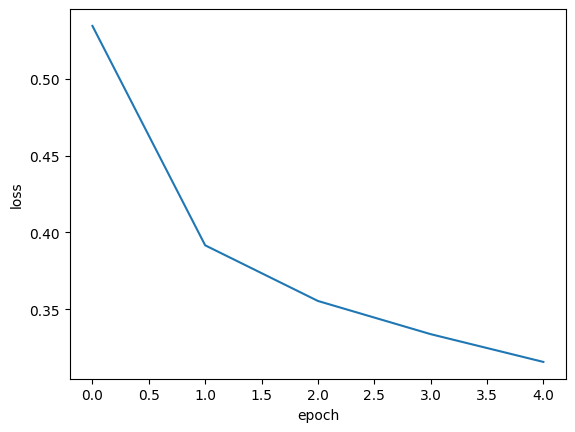

In [20]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

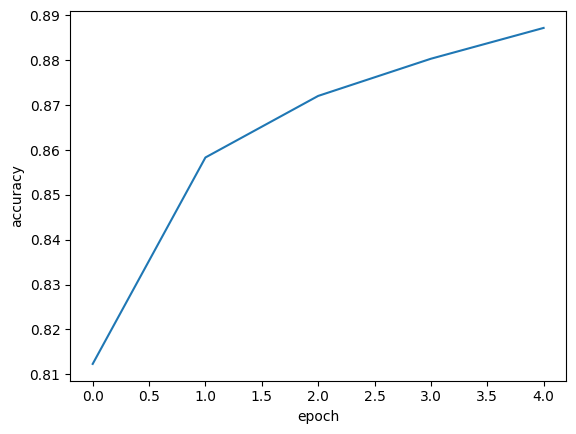

In [22]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

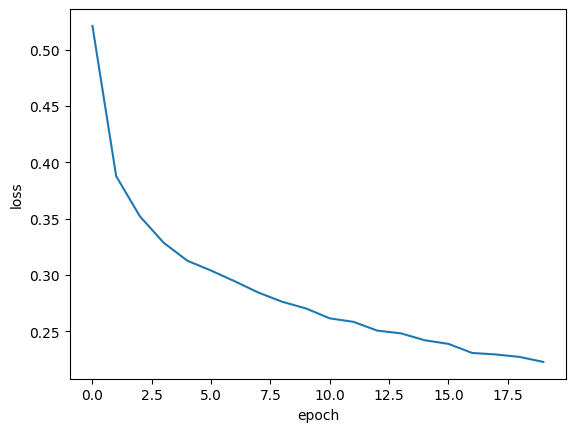

In [23]:
# epochs = 20회

model= model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose =0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 뭐 놓친거 없냐고 물어보는데 ,,ㅜ?

# 검증 손실

In [24]:
# 에포크에 따른 과대,과소적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요

# 검증 손실 계산
model= model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose =0,
                    validation_data=(val_scaled,val_target))

# validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달

In [25]:
# history 매개변수 확인
history.history.keys()
# 검증 세트에 대한 손실은 'val_loss' , 정확도는 'val_accuracy'에 들어가있음.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

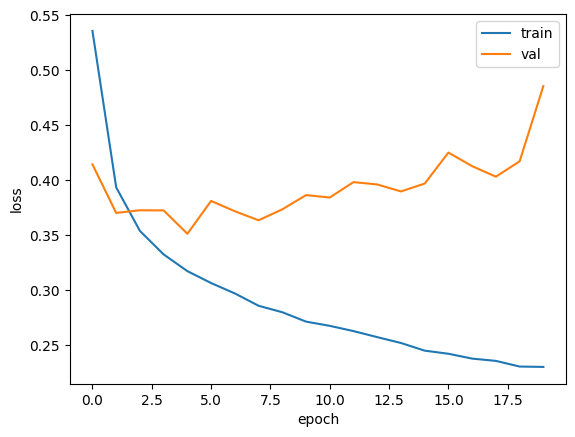

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

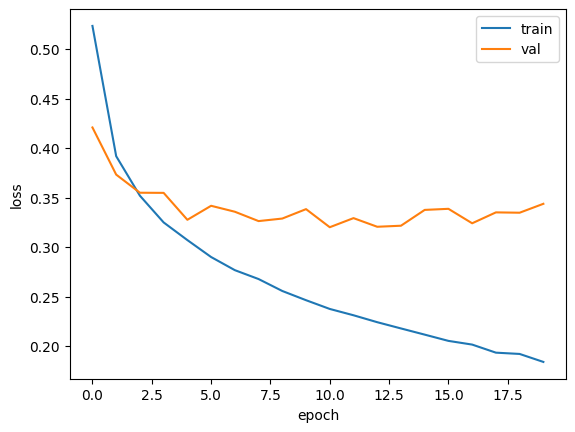

In [27]:
# 초기에 검증 손실이 감소하다가 4번째? 이후부터 다시 상승
# train 손실은 계속 감소하기에 전형적인 과대적합 모델이 만들어짐.

# 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가

# --> 옵티마이저 하이퍼파라미터를 조정하여 과대적합 완화해보자
# Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정 가능
model= model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose =0,
                    validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 드롭아웃

In [28]:
# 훈련 과정에서 일부 뉴런의 출력을 0으로 만들어 과대적합을 만든다.
# 뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지는 우리가 정해야 할 또 다른 하이퍼파라미터

# Q. 드롭아웃이 왜 과대적합을 막을까?
# --> 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고
#      모든 입력에 대해 주의를 기울여야 한다.

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

# dropout층은 훈련되는 모델 파라미터가 없음.
# 또한 입력과 출력의 크기가 같음 -> 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음.

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


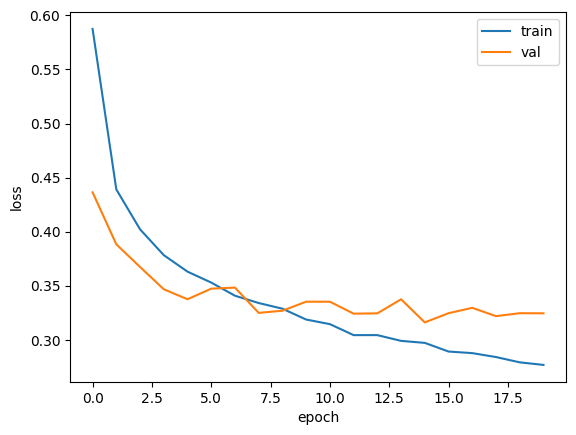

In [29]:
# 훈련이 끝난 뒤에 평가나 예측을 할 때는 드롭아웃을 사용하면 안됨 -> 훈련된 모든 뉴런을 사용해야 올바른 예측 수행 가능

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose =0,
                    validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
# 과대적합이 훨씬 줄은 것을 확인할 수 있음.-> 10번으로 해보자

# 모델 저장과 복원

In [34]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose =0,
                    validation_data=(val_scaled,val_target))

# 나중에 이 모델을 사용하려면 저장해둬야 한다.
# 이 때 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 사용
# 확장자가 .h5일 경우 HDF5포맷으로 저자한다.

model.save_weights('model-weights.h5')

# 모델 구조와 모델 파라미터를 함께 저장하는 save()
model.save('model-whloe.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
# 만들어진 파일 확인

!ls -al *.h5

-rw-r--r-- 1 root root 333320 Oct  3 06:53 model-weights.h5
-rw-r--r-- 1 root root 981176 Oct  3 06:53 model-whloe.h5


In [36]:
# 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5파일에서 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [37]:
# 이 모델의 검증 정확도 확인
# 케라스에서 예측을 수행하는 predict() 메서드는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률 반환
import numpy as np
val_labels = np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 3ms/step
0.879


In [40]:
# 이번에는 모델 전체를 읽은 다음 정확도 출력
model = keras.models.load_model('model-whloe.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3275 - accuracy: 0.8790


[0.32748159766197205, 0.8790000081062317]

In [41]:
# 모델을 두번씩 훈련하지 않고 한 번에 과대적합 되지 않는 에포크만큼 다시 훈련할 수는 없을까?

# 콜백

In [44]:
# 콜백 : 훈련 과정 중간에 어떤 작업을 수행할 수 있는 객체
# 여기서 사용할 ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled,train_target, epochs=20 ,verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3268 - accuracy: 0.8860


[0.32677575945854187, 0.8859999775886536]

In [46]:
# ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장
# but 20번의 에포크동안 훈련을 다함.
# 한 번 검증 점수가 상승하게 되면 그 이후에는 계속 과대적합이 커지기 때문에 훈련을 계속할 필요가 없음.
# 조기종료 필요 (케라스의 EarlyStopping 콜백 제공)

# patience매개변수 : 2로 지정하면 2번 연속 검증 점수가 향상하지 않으면 훈련 중지
# restore_best_weights 매개변수를 True로 지정하면 가장 낮은 손실을 낸 모델 파라미터 되돌림

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled,train_target, epochs=20 ,verbose= 0 ,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
# 훈련을 마치고 나면 몇번째 에포크에서 훈련이 중지되었는지 early_stopping_cb객체의 stopped_epoch 속성에서 확인 가능
print(early_stopping_cb.stopped_epoch)

# 10번째 에포크에서 중지했다는 의미 patience를 2로 지정했으니
# 최상의 모델은 9번째 에포크일 것 !

10


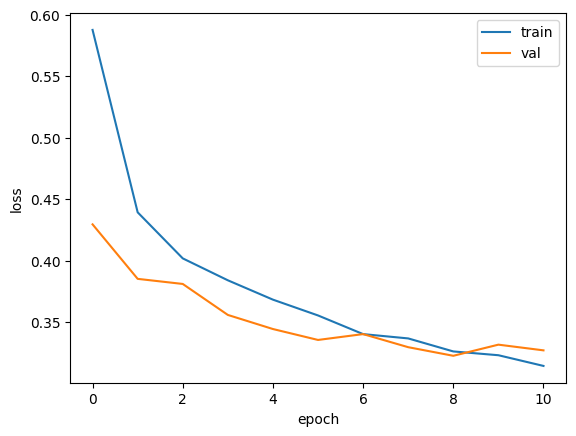

In [49]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [50]:
# 조기종료로 얻은 모델을 사용해 검증 세트 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3226 - accuracy: 0.8823


[0.3225957751274109, 0.8822500109672546]